# Simplifiying the Identification of Code Optimization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib.backends.backend_pdf import PdfPages

## Data Preprocessing

In [2]:
def load_data_from_csv(CSV_PATH):
    return pd.read_csv(CSV_PATH,delimiter = ';',
                       names = ["module_sub_routine","id","hardware_Counter","time","event"])

In [3]:
def drop_columns(dataFrame,list_col):
    return dataFrame.drop(list_col,axis=1)

In [4]:
# Modifying the data

arr = ['module_sub_routine','id','time']
scalerPath = '../../data/WACCM_imp_sol_scaler.slope.labelled.csv'
scalarDF = load_data_from_csv(scalerPath)
scalarDF = drop_columns(scalarDF,arr)
    
vectorPath = '../../data/WACCM_imp_sol_vector.slope.labelled.csv'
vectorDF = load_data_from_csv(vectorPath)
vectorDF = drop_columns(vectorDF,arr)
    
psradPath = '../../data/mg2/PSrad.exe.codeblocks.fused.any.any.any.slope.labelled .csv'
psradDF = load_data_from_csv(psradPath)
psradDF = drop_columns(psradDF,arr)
    
wetdepaPath = '../../data/wetdepa_driver_v0.labelled.csv'
wetdepaDF = load_data_from_csv(wetdepaPath)
wetdepaDF = drop_columns(wetdepaDF,arr)
    
clubbPath = '../../data/clubb.labelled.csv'
clubbDF = load_data_from_csv(clubbPath)
clubbDFTest = clubbDF
clubbDF = drop_columns(clubbDF,arr)

In [5]:
clubbDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82800 entries, 0 to 82799
Data columns (total 2 columns):
hardware_Counter    82800 non-null object
event               82800 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [6]:
def get_CounterNames(dataFrame):
    counter_name = dataFrame['hardware_Counter']
    return counter_name.unique()

def remove_ABS_Counter(counterNames):
    counterName = []
    for str in counterNames:
        if "_per_ins" in str:
            counterName.append(str)
        elif "LABEL" == str:
            counterName.append(str)
    return counterName

In [7]:
counter_name = get_CounterNames(vectorDF)
counterNameList = remove_ABS_Counter(counter_name) 
counterNameList.remove("PAPI_VEC_DP_per_ins")
len(counterNameList)


43

Above two list has different number of items. Out of all the lists VectorDF has less number of hardware counters. So considering only vectorDF.

In [8]:
def rearrange(dataFrame,counterNameList):
    df_per_ins = pd.DataFrame(columns = counterNameList)
    for tempStr in counterNameList:
        temp_df = dataFrame[dataFrame['hardware_Counter'] == tempStr]
        df_per_ins[tempStr] = temp_df['event'].values
    df_per_ins = df_per_ins[~df_per_ins.isin([np.nan,np.inf,-np.inf]).any(1)]
    return df_per_ins

In [9]:
scalarDF = rearrange(scalarDF,counterNameList)
vectorDF = rearrange(vectorDF,counterNameList)
psradDF = rearrange(psradDF,counterNameList)
wetdepaDF = rearrange(wetdepaDF,counterNameList)
clubbDF = rearrange(clubbDF,counterNameList)    

In [10]:
def append_DataFrames(dataFrameA,dataFrameB):
    return dataFrameA.append(dataFrameB)

In [11]:
resultDF = append_DataFrames(scalarDF,vectorDF)
resultDF = append_DataFrames(resultDF, psradDF)
resultDF = append_DataFrames(resultDF,wetdepaDF)

In [12]:
resultDF

,PAPI_BR_CN_per_ins,PAPI_BR_INS_per_ins,PAPI_BR_MSP_per_ins,PAPI_BR_NTK_per_ins,PAPI_BR_PRC_per_ins,PAPI_BR_TKN_per_ins,PAPI_BR_UCN_per_ins,PAPI_DP_OPS_per_ins,PAPI_L1_DCM_per_ins,PAPI_L1_ICM_per_ins,...,PAPI_L3_TCW_per_ins,PAPI_LD_INS_per_ins,PAPI_SP_OPS_per_ins,PAPI_SR_INS_per_ins,PAPI_STL_ICY_per_ins,PAPI_TLB_DM_per_ins,PAPI_TLB_IM_per_ins,PAPI_TOT_CYC_per_ins,RESOURCE_STALLS_per_ins,LABEL
1,0.044295,0.058603,0.000749,0.017464,0.043467,0.026829,0.014308,0.000000,0.039988,0.000000,...,0.010735,0.082503,0.0,0.251564,0.000000,0.002026,0.000421,1.439640,0.267150,-1.0
2,0.033854,0.044791,0.000572,0.013353,0.033225,0.020500,0.010936,0.000000,0.030483,0.000000,...,0.008149,0.400129,0.0,0.192323,0.262785,0.001548,0.000322,1.100610,0.203565,-1.0
3,0.033807,0.044730,0.000571,0.013344,0.033185,0.020462,0.010923,0.000000,0.030292,0.000000,...,0.008048,0.400268,0.0,0.192153,0.513357,0.001546,0.000321,1.099620,0.202199,-1.0
4,0.033741,0.044645,0.000569,0.013332,0.033129,0.020408,0.010904,0.000000,0.030016,0.000000,...,0.007914,0.400445,0.0,0.191920,0.514072,0.001541,0.000320,1.098210,0.200261,-1.0
5,0.033658,0.044538,0.000567,0.013316,0.033061,0.020341,0.010880,0.000000,0.029668,0.000000,...,0.007755,0.400645,0.0,0.191635,0.514923,0.001535,0.000319,1.096450,0.197821,-1.0
6,0.033561,0.044414,0.000564,0.013298,0.032981,0.020263,0.010852,0.000000,0.029268,0.000000,...,0.007576,0.400855,0.0,0.191306,0.515866,0.001526,0.000317,1.094380,0.194979,-1.0
7,0.033453,0.044274,0.000561,0.013276,0.032893,0.020176,0.010821,0.000000,0.028822,0.000000,...,0.007382,0.401062,0.0,0.190940,0.516872,0.001515,0.000316,1.092020,0.191828,-1.0
8,0.033335,0.044122,0.000557,0.013252,0.032797,0.020082,0.010786,0.000000,0.028343,0.000000,...,0.007178,0.401257,0.0,0.190544,0.517907,0.001503,0.000314,1.089420,0.188439,-1.0
9,0.033211,0.043960,0.000553,0.013226,0.032695,0.019984,0.010749,0.000000,0.027845,0.000000,...,0.006967,0.401436,0.0,0.190125,0.518956,0.001489,0.000311,1.086640,0.184893,-1.0
10,0.033083,0.043795,0.000548,0.013199,0.032590,0.019883,0.010711,0.000000,0.027339,0.000000,...,0.006755,0.401614,0.0,0.189702,0.520022,0.001474,0.000309,1.083780,0.181259,-1.0


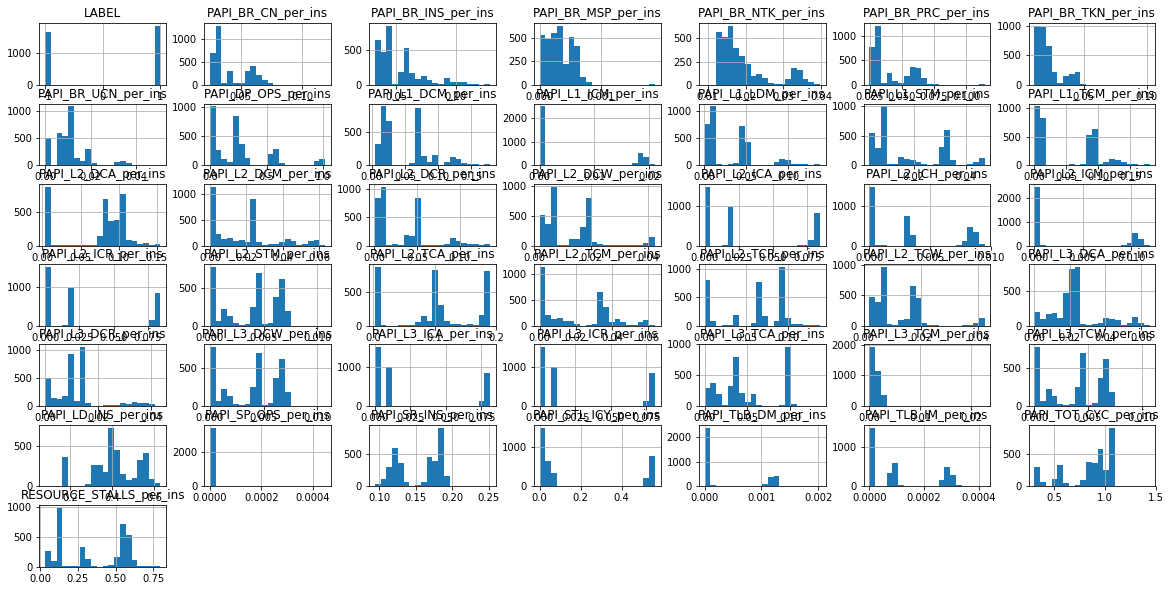

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

resultDF.hist(bins = 20,figsize=(20,10))
plt.show()

## Create Test Set

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(resultDF,test_size = 0.2, random_state=42)
print(len(train_set),"Train +",len(test_set),"test")

(2795, 'Train +', 699, 'test')


In [15]:
test_set.head()

,PAPI_BR_CN_per_ins,PAPI_BR_INS_per_ins,PAPI_BR_MSP_per_ins,PAPI_BR_NTK_per_ins,PAPI_BR_PRC_per_ins,PAPI_BR_TKN_per_ins,PAPI_BR_UCN_per_ins,PAPI_DP_OPS_per_ins,PAPI_L1_DCM_per_ins,PAPI_L1_ICM_per_ins,...,PAPI_L3_TCW_per_ins,PAPI_LD_INS_per_ins,PAPI_SP_OPS_per_ins,PAPI_SR_INS_per_ins,PAPI_STL_ICY_per_ins,PAPI_TLB_DM_per_ins,PAPI_TLB_IM_per_ins,PAPI_TOT_CYC_per_ins,RESOURCE_STALLS_per_ins,LABEL
949,0.028966,0.036510,0.000335,0.016255,0.028692,0.012710,0.007542,0.247923,0.070003,0.018424,...,0.006376,0.549109,0.0,0.170446,0.052079,0.000026,0.000076,0.930827,0.546198,1.0
369,0.061183,0.061195,0.000000,0.035588,0.059904,0.025597,0.000000,0.567718,0.014878,0.000000,...,0.000000,0.382106,0.0,0.131916,0.000000,0.000000,0.000000,0.569980,0.310028,1.0
654,0.057224,0.067766,0.000157,0.020206,0.057177,0.037021,0.010545,0.240337,0.130431,0.000162,...,0.001560,0.446779,0.0,0.107410,0.002884,0.000040,0.000003,0.836692,0.563632,-1.0
884,0.028393,0.035773,0.000313,0.016018,0.027957,0.012375,0.007378,0.244307,0.069302,0.018313,...,0.006289,0.516829,0.0,0.171630,0.052827,0.000034,0.000078,0.916432,0.539805,1.0
773,0.053858,0.101274,0.000308,0.014396,0.050709,0.039437,0.047438,0.401446,0.068913,0.000163,...,0.006475,0.315747,0.0,0.121373,0.004819,0.000786,0.000004,0.914490,0.587025,-1.0


In [16]:
corr_matrix = resultDF.corr()

In [17]:
corr_matrix["LABEL"].sort_values(ascending = False)

LABEL                      1.000000
PAPI_L1_ICM_per_ins        0.601138
PAPI_L2_ICM_per_ins        0.599744
PAPI_L2_ICH_per_ins        0.376299
PAPI_BR_NTK_per_ins        0.359937
RESOURCE_STALLS_per_ins    0.247597
PAPI_DP_OPS_per_ins        0.225038
PAPI_L1_STM_per_ins        0.154447
PAPI_LD_INS_per_ins        0.133888
PAPI_L2_TCM_per_ins        0.126695
PAPI_L1_TCM_per_ins        0.118934
PAPI_L3_TCM_per_ins        0.008795
PAPI_L2_DCM_per_ins       -0.025559
PAPI_L3_DCW_per_ins       -0.090546
PAPI_L2_STM_per_ins       -0.090546
PAPI_L3_TCW_per_ins       -0.090546
PAPI_SP_OPS_per_ins       -0.107840
PAPI_L2_DCW_per_ins       -0.119651
PAPI_L2_DCR_per_ins       -0.128108
PAPI_L2_TCW_per_ins       -0.143697
PAPI_L1_LDM_per_ins       -0.148066
PAPI_L1_DCM_per_ins       -0.151942
PAPI_SR_INS_per_ins       -0.166720
PAPI_BR_PRC_per_ins       -0.182877
PAPI_BR_CN_per_ins        -0.192655
PAPI_BR_INS_per_ins       -0.344690
PAPI_L3_DCR_per_ins       -0.349311
PAPI_BR_UCN_per_ins       -0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d6e9f90>,
      dtype=object)

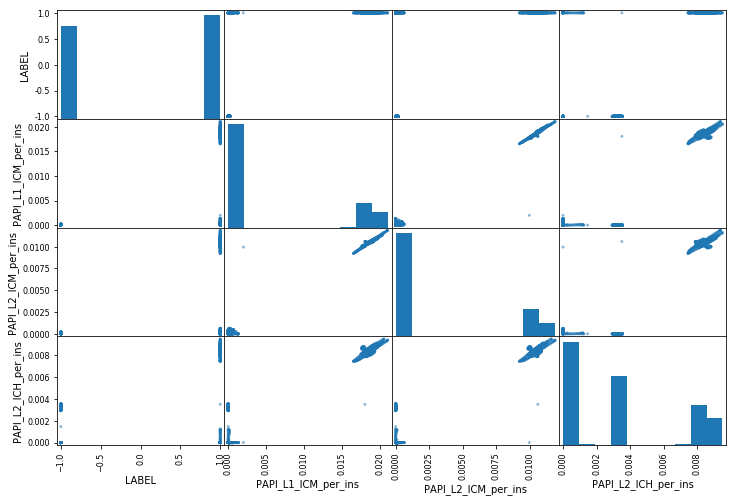

In [18]:
attributes = ["LABEL","PAPI_L1_ICM_per_ins","PAPI_L2_ICM_per_ins","PAPI_L2_ICH_per_ins"]

from pandas.plotting import scatter_matrix

scatter_matrix(resultDF[attributes], figsize=(12,8)) ## scatter matrix plots every numerical attributes against each other numerical attribute

## Prepare Data for ML

In [19]:
train_Features = train_set.drop("LABEL",axis=1)
train_Labels = train_set["LABEL"].copy()

## Feature Scaling

In [20]:
# Making all the features in same scale. Creating a pipeline to handle this. But most of our data is in same scale I am not using it. 
# it is for future purpose only

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [21]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        
    ])

In [22]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

train_Features_prepared = full_pipeline.fit_transform(train_Features)

forest_reg.fit(train_Features_prepared,train_Labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
from sklearn.metrics import mean_squared_error

label_predictions = forest_reg.predict(train_Features_prepared)
forest_mse = mean_squared_error(train_Labels, label_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.042632514656109594

In [24]:
def display_scores(scores):
    print("Scores :", scores)
    print("Mean :",scores.mean())
    print("Standard Deviation :",scores.std())

In [25]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_Features_prepared, train_Labels,
                                scoring= "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

('Scores :', array([0.0621059 , 0.02390457, 0.13575187, 0.08618916, 0.09783368,
       0.12269378, 0.04789475, 0.02394737, 0.02394737, 0.01197369]))
('Mean :', 0.06362421462237415)
('Standard Deviation :', 0.04244376140912208)


In [26]:
from sklearn.model_selection import GridSearchCV


param_grid = {"max_depth": [3, None],
              "max_features": [2,4,6,8],
              "bootstrap": [True, False],
              "n_estimators" : [1,3,10,20,50,100]
              }
forest_reg = RandomForestRegressor()


grid_search = GridSearchCV(forest_reg,param_grid,cv =10, scoring = 'neg_mean_squared_error')

grid_search.fit(train_Features_prepared,train_Labels)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [2, 4, 6, 8], 'n_estimators': [1, 3, 10, 20, 50, 100], 'bootstrap': [True, False], 'max_depth': [3, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [27]:
grid_search.best_params_

{'bootstrap': False, 'max_depth': None, 'max_features': 4, 'n_estimators': 50}

In [28]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [29]:
cvres = grid_search.cv_results_
for mean_score , params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

(0.21604067697282803, {'max_features': 2, 'n_estimators': 1, 'bootstrap': True, 'max_depth': 3})
(0.19535355729930673, {'max_features': 2, 'n_estimators': 3, 'bootstrap': True, 'max_depth': 3})
(0.17296994474116129, {'max_features': 2, 'n_estimators': 10, 'bootstrap': True, 'max_depth': 3})
(0.16686322918090477, {'max_features': 2, 'n_estimators': 20, 'bootstrap': True, 'max_depth': 3})
(0.16444250276217018, {'max_features': 2, 'n_estimators': 50, 'bootstrap': True, 'max_depth': 3})
(0.16016545284750425, {'max_features': 2, 'n_estimators': 100, 'bootstrap': True, 'max_depth': 3})
(0.21318318758508958, {'max_features': 4, 'n_estimators': 1, 'bootstrap': True, 'max_depth': 3})
(0.1638011011920721, {'max_features': 4, 'n_estimators': 3, 'bootstrap': True, 'max_depth': 3})
(0.14261278187157356, {'max_features': 4, 'n_estimators': 10, 'bootstrap': True, 'max_depth': 3})
(0.1447924682933285, {'max_features': 4, 'n_estimators': 20, 'bootstrap': True, 'max_depth': 3})
(0.13707334314127118, {'m

In [30]:
pd.DataFrame(grid_search.cv_results_)

/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_max_depth,param_max_features,param_n_estimators,params,rank_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.005377,0.000571,-0.046674,-0.039278,True,3,2,1,"{u'max_features': 2, u'n_estimators': 1, u'boo...",96,...,-0.027886,-0.024847,-0.042361,-0.058971,-0.007499,-0.028471,0.000933,0.000132,0.031110,0.013539
1,0.011670,0.000613,-0.038163,-0.035487,True,3,2,3,"{u'max_features': 2, u'n_estimators': 3, u'boo...",91,...,-0.046344,-0.055273,-0.019941,-0.024306,-0.036618,-0.047176,0.000858,0.000049,0.009266,0.010878
2,0.034768,0.000985,-0.029919,-0.028142,True,3,2,10,"{u'max_features': 2, u'n_estimators': 10, u'bo...",86,...,-0.009906,-0.023138,-0.020361,-0.024150,-0.027692,-0.037759,0.001395,0.000025,0.011817,0.006631
3,0.067914,0.001544,-0.027843,-0.026777,True,3,2,20,"{u'max_features': 2, u'n_estimators': 20, u'bo...",83,...,-0.014052,-0.028294,-0.029223,-0.032643,-0.010467,-0.021417,0.004809,0.000085,0.009584,0.004763
4,0.166749,0.002968,-0.027041,-0.024900,True,3,2,50,"{u'max_features': 2, u'n_estimators': 50, u'bo...",82,...,-0.019963,-0.027589,-0.021025,-0.021578,-0.016189,-0.025479,0.008589,0.000127,0.009437,0.002516
5,0.326326,0.005497,-0.025653,-0.023200,True,3,2,100,"{u'max_features': 2, u'n_estimators': 100, u'b...",79,...,-0.015116,-0.024895,-0.020626,-0.022008,-0.015772,-0.025278,0.001960,0.000209,0.008837,0.001638
6,0.005084,0.000467,-0.045447,-0.036465,True,3,4,1,"{u'max_features': 4, u'n_estimators': 1, u'boo...",95,...,-0.014920,-0.022600,-0.014103,-0.026313,-0.028407,-0.037473,0.000147,0.000010,0.047846,0.032462
7,0.012780,0.000593,-0.026831,-0.021358,True,3,4,3,"{u'max_features': 4, u'n_estimators': 3, u'boo...",81,...,-0.016273,-0.025815,-0.020509,-0.017597,-0.019203,-0.027399,0.000773,0.000026,0.018254,0.004520
8,0.038771,0.000984,-0.020338,-0.018981,True,3,4,10,"{u'max_features': 4, u'n_estimators': 10, u'bo...",70,...,-0.007140,-0.018186,-0.028812,-0.023353,-0.004868,-0.013737,0.001023,0.000026,0.009912,0.002676
9,0.076369,0.001502,-0.020965,-0.018722,True,3,4,20,"{u'max_features': 4, u'n_estimators': 20, u'bo...",74,...,-0.009651,-0.015743,-0.018191,-0.017278,-0.012058,-0.018381,0.002117,0.000065,0.008895,0.002366


In [31]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.00888572, 0.02806887, 0.06014977, 0.00069033, 0.00670609,
       0.02992493, 0.05743352, 0.02731989, 0.02255564, 0.00889078,
       0.01330388, 0.03430017, 0.04520485, 0.09184414, 0.04861996,
       0.00105657, 0.00515835, 0.00035257, 0.01626057, 0.00159701,
       0.00508674, 0.00502684, 0.04145271, 0.02074673, 0.04612942,
       0.00122735, 0.0231374 , 0.02383827, 0.00989924, 0.00017906,
       0.02913857, 0.17852161, 0.00098383, 0.0005078 , 0.01576502,
       0.00019498, 0.00169404, 0.01784359, 0.0511359 , 0.01772423,
       0.00036035, 0.00108271])

In [32]:
sorted(zip(feature_importances, counterNameList),reverse =True) # Importance Score

[(0.17852161283708484, 'PAPI_L3_TCA_per_ins'),
 (0.09184413861430243, 'PAPI_L2_DCA_per_ins'),
 (0.0601497698322996, 'PAPI_BR_MSP_per_ins'),
 (0.057433516207838986, 'PAPI_BR_UCN_per_ins'),
 (0.05113589676677291, 'PAPI_TLB_DM_per_ins'),
 (0.04861996120085958, 'PAPI_L2_DCM_per_ins'),
 (0.04612941908548652, 'PAPI_L2_TCR_per_ins'),
 (0.045204853290358324, 'PAPI_L1_TCM_per_ins'),
 (0.04145271171663622, 'PAPI_L2_TCA_per_ins'),
 (0.03430016517338139, 'PAPI_L1_STM_per_ins'),
 (0.02992493345187564, 'PAPI_BR_TKN_per_ins'),
 (0.029138574938875787, 'PAPI_L3_ICR_per_ins'),
 (0.02806886982541187, 'PAPI_BR_INS_per_ins'),
 (0.027319893976669105, 'PAPI_DP_OPS_per_ins'),
 (0.02383826758015546, 'PAPI_L3_DCR_per_ins'),
 (0.02313740464615807, 'PAPI_L3_DCA_per_ins'),
 (0.02255563537037324, 'PAPI_L1_DCM_per_ins'),
 (0.020746729523787328, 'PAPI_L2_TCM_per_ins'),
 (0.017843593118823806, 'PAPI_STL_ICY_per_ins'),
 (0.017724232059555804, 'PAPI_TLB_IM_per_ins'),
 (0.016260565457109605, 'PAPI_L2_ICH_per_ins'),
 (0.0

In [33]:
final_model = grid_search.best_estimator_

test_Features = test_set.drop("LABEL",axis=1)
test_Labels = test_set["LABEL"].copy()

X_test_prepared = full_pipeline.transform(test_Features)

final_prediction = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(test_Labels, final_prediction)
final_rmse = np.sqrt(final_mse)

final_rmse

0.03640497065528301

In [34]:
clubb_Features = clubbDF.drop("LABEL",axis=1)
clubb_Labels = clubbDF["LABEL"].copy()

clubb_prepared = full_pipeline.transform(clubb_Features)

clubb_prediction = final_model.predict(clubb_prepared)


final_mse = mean_squared_error(clubb_Labels, clubb_prediction)
final_rmse = np.sqrt(final_mse)

final_rmse

0.7727745107367636

In [35]:
q1_Actual = 0
q1_predict = 0
q2_predict = 0
q3_Actual = 0
q3_predict = 0
q4_predict = 0

correctPred = []
correctLabel = []
badPred = []
badLabel = []
        
timslots = []
tempVal = []
for i in range(len(clubb_prediction)):
    threshold = abs(clubb_Labels[i] * (float(51)/float(100)))
    if clubb_Labels[i] < 0 :
        q3_Actual = q3_Actual +1
        if clubb_prediction[i] > 0:
            q2_predict = q2_predict +1
            badPred.append(clubb_prediction[i])
            badLabel.append(clubb_Labels[i])
        else:
            q3_predict = q3_predict + 1
            correctPred.append(clubb_prediction[i])
            correctLabel.append(clubb_Labels[i])
            if abs(clubb_prediction[i] - clubb_Labels[i]) < threshold:
                timslots.append(i)
                tempVal.append(clubb_prediction[i])
    else :
        q1_Actual = q1_Actual +1
        if clubb_prediction[i] > 0:
            q1_predict = q1_predict +1
            correctPred.append(clubb_prediction[i])
            correctLabel.append(clubb_Labels[i])
        else: 
            q4_predict = q4_predict + 1
            badPred.append(clubb_prediction[i])
            badLabel.append(clubb_Labels[i])
        
correctPrediction = q3_predict + q1_predict
wrongPrediction = q2_predict + q4_predict
total = q3_Actual + q1_Actual

print timslots        
print q3_predict
print q1_predict
print q2_predict
        
goodPercent = round(float((float(correctPrediction)/float(total))*100),2)
badPercent = round(float((float(wrongPrediction)/float(total))*100),2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 34, 35, 36, 37, 39, 83, 84, 85, 86, 87, 88, 89, 290, 291, 292, 293, 294, 295, 296, 297, 546, 557, 558, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 586, 587, 588, 589, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899]
829
0
71


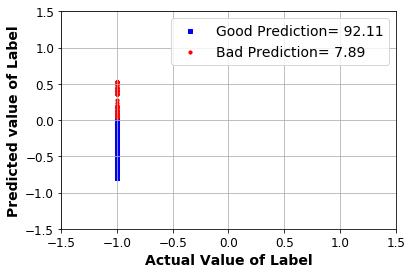

In [36]:
fig, ax = plt.subplots()
        
ax.scatter(correctLabel,correctPred,s=10,c='b',marker='s',label = 'Good Prediction= {}'.format(goodPercent))
        
ax.scatter(badLabel,badPred,s=10,c='r',marker = 'o',label = 'Bad Prediction= {}'.format(badPercent))
        
        
ax.legend(loc = 'upper right', prop={'size': 14})
ax.set_xlabel('Actual Value',fontsize=14 , fontweight = 'bold')
ax.set_ylabel('Prediction Value',fontsize=14, fontweight = 'bold')
    
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
    
ax.set_xlabel('Actual Value of Label')
ax.set_ylabel('Predicted value of Label')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.grid(True)
        
plt.show()

In [37]:
tempVal

[-0.56,
 -0.56,
 -0.56,
 -0.56,
 -0.56,
 -0.56,
 -0.56,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.56,
 -0.56,
 -0.56,
 -0.56,
 -0.56,
 -0.52,
 -0.52,
 -0.56,
 -0.56,
 -0.56,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.56,
 -0.6,
 -0.52,
 -0.68,
 -0.68,
 -0.68,
 -0.68,
 -0.76,
 -0.76,
 -0.76,
 -0.76,
 -0.76,
 -0.76,
 -0.76,
 -0.8,
 -0.8,
 -0.76,
 -0.76,
 -0.76,
 -0.76,
 -0.68,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.56,
 -0.6,
 -0.6,
 -0.64,
 -0.64,
 -0.64,
 -0.64,
 -0.64,
 -0.64,
 -0.64,
 -0.64,
 -0.64,
 -0.64,
 -0.64,
 -0.64,
 -0.64,
 -0.64,
 -0.64,
 -0.64,
 -0.68,
 -0.68,
 -0.68,
 -0.68,
 -0.68,
 -0.68,
 -0.68,
 -0.68,
 -0.68,
 -0.68,
 -0.68,
 -0.72,
 -0.72,
 -0.72,
 -0.72,
 -0.56,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.52,
 -0.64,
 -0.68,
 -0.68,
 -0.68]

### Randomized Search CV

In [38]:
# # from scipy.stats import randint as sp_randint

# # specify parameters and distributions to sample from
# # param_dist = {"max_depth": [3, None],
#               "max_features": sp_randint(1, 11),
#               "bootstrap": [True, False],
#               "n_estimators" : [1,3,10,20,40,60]
#               }

In [39]:
# from sklearn.model_selection import RandomizedSearchCV

# n_iter_search = 20
# random_search = RandomizedSearchCV(forest_reg, param_distributions=param_dist,
#                                    n_iter=n_iter_search)
# random_search.fit(train_Features,train_Labels)

In [40]:
# final_model_random = random_search.best_estimator_

# test_Features = test_set.drop("LABEL",axis=1)
# test_Labels = test_set["LABEL"].copy()

# test_Features_transformed = full_pipeline.transform(test_Features)
# final_prediction_random = final_model_random.predict(test_Features_transformed)

# final_mse_random = mean_squared_error(test_Labels, final_prediction_random)
# final_rmse_random = np.sqrt(final_mse_random)

In [41]:
# clubb_prepared = full_pipeline.transform(clubb_Features)

# clubb_prediction_random = final_model_random.predict(clubb_prepared)

# final_mse = mean_squared_error(clubb_Labels, clubb_prediction_random)
# final_rmse = np.sqrt(final_mse)

In [42]:
# final_rmse

In [43]:
# q1_Actual = 0
# q1_predict = 0
# q2_predict = 0
# q3_Actual = 0
# q3_predict = 0
# q4_predict = 0

# correctPred = []
# correctLabel = []
# badPred = []
# badLabel = []
        
# timslots = []
# tempVal = []
# for i in range(len(clubb_prediction_random)):
#     threshold = abs(clubb_Labels[i] * (float(80)/float(100)))
#     if clubb_Labels[i] < 0 :
#         q3_Actual = q3_Actual +1
#         if clubb_prediction_random[i] > 0:
#             q2_predict = q2_predict +1
#             badPred.append(clubb_prediction_random[i])
#             badLabel.append(clubb_Labels[i])
#         else:
#             q3_predict = q3_predict + 1
#             correctPred.append(clubb_prediction_random[i])
#             correctLabel.append(clubb_Labels[i])
#             if abs(clubb_prediction_random[i] - clubb_Labels[i]) < threshold:
#                 timslots.append(i)
#                 tempVal.append(clubb_prediction_random[i])
#     else :
#         q1_Actual = q1_Actual +1
#         if clubb_prediction_random[i] > 0:
#             q1_predict = q1_predict +1
#             correctPred.append(clubb_prediction_random[i])
#             correctLabel.append(clubb_Labels[i])
#         else: 
#             q4_predict = q4_predict + 1
#             badPred.append(clubb_prediction_random[i])
#             badLabel.append(clubb_Labels[i])
        
# correctPrediction = q3_predict + q1_predict
# wrongPrediction = q2_predict + q4_predict
# total = q3_Actual + q1_Actual

# print timslots        
# print q3_predict
# print q1_predict
# print q2_predict
        
# goodPercent = round(float((float(correctPrediction)/float(total))*100),2)
# badPercent = round(float((float(wrongPrediction)/float(total))*100),2)

# clubb_Labels

In [44]:
# fig, ax = plt.subplots()
        
# ax.scatter(correctLabel,correctPred,s=10,c='b',marker='s',label = 'Good Prediction= {}'.format(goodPercent))
        
# ax.scatter(badLabel,badPred,s=10,c='r',marker = 'o',label = 'Bad Prediction= {}'.format(badPercent))
        
        
# ax.legend(loc = 'upper right', prop={'size': 14})
# ax.set_xlabel('Actual Value',fontsize=14 , fontweight = 'bold')
# ax.set_ylabel('Prediction Value',fontsize=14, fontweight = 'bold')
    
# ax.xaxis.set_tick_params(labelsize=12)
# ax.yaxis.set_tick_params(labelsize=12)
    
# ax.set_xlabel('Actual Value of Label')
# ax.set_ylabel('Predicted value of Label')
# ax.set_xlim(-1.5,1.5)
# ax.set_ylim(-1.5,1.5)
# ax.grid(True)
        
# plt.show()

In [45]:
def rearrangeTime(dataFrame,counterNameList):
    for tempStr in counterNameList:
        temp_df = dataFrame[dataFrame['hardware_Counter'] == tempStr]
        df_per_ins = temp_df['time'].values
    return df_per_ins

In [46]:
counter = ['PAPI_BR_CN']
slots = rearrangeTime(clubbDFTest,counter)
timeVal = []
  
for i in timslots:
    timeVal.append(round(slots[i],3))

In [47]:
priorityDict = {}

for i in range(len(timslots)):
    priorityDict[timeVal[i]] = tempVal[i] * -1

In [48]:
import sys
import os
from collections import OrderedDict
import matplotlib.pyplot as plt
import operator

# event type ranges
FOLDED_SAMPLING_CALLER_LINE = range(631000100, 631000200)

class ExtraeRowData(object):

    def __init__(self, path):
        # NOTE: not used for now
        pass

class ExtraePcfData(object):

    def __init__(self, path):

        self.events = {}

        BLANK, HEAD, VALUE = 0, 1, 2
        state = BLANK

        with open(path, 'r') as fh:

            eventtypes = []
            eventvalues = {}

            for line in fh:

                line = line.strip()
                if len(line) == 0:
                    state = BLANK
                    continue

                if state == BLANK:
                    if line == "EVENT_TYPE":
                        for eventtype in eventtypes:
                            eventtype['values'] = eventvalues
                        eventtypes = []
                        eventvalues = {}
                        state = HEAD
                elif state == HEAD:
                    if line == "VALUES":
                        state = VALUE
                    else:
                        items = line.split()
                        if len(items) > 2:
                            eventtype = {'desc': ' '.join(items[2:])}
                            eventtypes.append(eventtype)
                            self.events[int(items[1])] = eventtype
                elif state == VALUE:
                    items = line.split()
                    if len(items) > 2:
                        eventvalues[int(items[0])] = (items[1], ' '.join(items[2:]))
                    elif len(items) == 2:
                        eventvalues[int(items[0])] = ' '.join(items[1:])

            for eventtype in eventtypes:
                eventtype['values'] = eventvalues

class ExtraePrvData(object):

    def __init__(self, path):

        self.events = OrderedDict()

        with open(path, 'r') as fh:

            for line in fh:

                line = line.strip()

                if len(line) == 0:
                    continue

                if line[0] != "2":
                    continue

                items = line.split(":")

                timestamp = int(items[5])

                prvevent = OrderedDict()
                self.events[timestamp] = prvevent

                for etype, evalue in zip(items[6::2], items[7::2]):
                    prvevent[int(etype)] = int(evalue)

class ExtraeRawData(object):


    def __init__(self, path):

        self.row = None
        self.pcf = None
        self.prv = None

        # check path
        root, ext = os.path.splitext(path)
        if ext in (".prv", ".pcf", ".row"):
            path = root

        # read row
        rowpath = path + ".row"
        if os.path.isfile(rowpath):
            self.row = ExtraeRowData(rowpath)

        # read pcf
        pcfpath = path + ".pcf"
        if os.path.isfile(pcfpath):
            self.pcf = ExtraePcfData(pcfpath)
        # read prv
        prvpath = path + ".prv"
        if os.path.isfile(prvpath):
            self.prv = ExtraePrvData(prvpath)

    def get_prv_events(self, eventrange):
        for timestamp, events in self.prv.events.items():
            for eventtype, eventvalue in events.items():
                if eventtype in eventrange:
                    yield timestamp, eventtype, eventvalue

    def get_prv_events_by_timestamp(self, timestamp):
        return self.prv.events[timestamp]

    def get_pcf_events(self, eventrange):
        for eventype, (desc, values) in self.pcf.events.items():
            if eventype in eventrange:
                yield desc, values

    def get_pcf_event(self, eventtype):
        return self.pcf.events[eventtype]


    def get_folded_sampling_caller_lines(self):

        lineidcounts = {}
        callerlevels = {}
        timelineids = {}

        prev_timestamp = None
        deepest_callstack = None

        for timestamp, callerlevel, lineid in self.get_prv_events(FOLDED_SAMPLING_CALLER_LINE):

            if callerlevel not in callerlevels:
                callerlevels[callerlevel] = {}
            if lineid not in callerlevels[callerlevel]:
                callerlevels[callerlevel][lineid] = None

            if timestamp != prev_timestamp:
                if prev_timestamp is not None:
                    timelineids[prev_timestamp] = deepest_callstack[1]
                    if deepest_callstack[1] in lineidcounts:
                        lineidcounts[deepest_callstack[1]] += 1
                    else:
                        lineidcounts[deepest_callstack[1]] = 1
                deepest_callstack = (callerlevel, lineid)
            elif callerlevel < deepest_callstack[0]:
                deepest_callstack = (callerlevel, lineid)
            prev_timestamp = timestamp

        if prev_timestamp is not None:
            timelineids[prev_timestamp] = deepest_callstack[1]
            if deepest_callstack[1] in lineidcounts:
                lineidcounts[deepest_callstack[1]] += 1
            else:
                lineidcounts[deepest_callstack[1]] = 1

        lineidsource = self.get_pcf_event(callerlevel)['values']
            
        return lineidcounts, callerlevels, lineidsource, timelineids

In [49]:
path ="../../data/clubb/kernel.exe.codeblocks.fused.folded"
extraeraw = ExtraeRawData(path)
lineidcounts, callerlevels, lineidsource, timelineids = extraeraw.get_folded_sampling_caller_lines()

In [50]:
def get_Time(path):
    time = []
    count =0
    with open(path, 'r') as fh:
        for line in fh:
            line = line.strip()
            if len(line) == 0:
                continue
            if line[0] != "2":
                continue
            items = line.split(":")
            count = count+1
            timestamp = int(items[5])
            time.append(timestamp)
            if count > 1:
                break
    return time

In [51]:
prvpath = path + ".prv"
    
if os.path.isfile(prvpath):
    rangeOfTime = get_Time(prvpath)
else:
    print "Please enter correct path"

In [52]:
timeLineIdDict = {}
listOfLineNum = []

In [53]:
# Mapping time and line ids
for i in timelineids:
    listOfLineNum.append(timelineids[i])
    val = i-rangeOfTime[0]
    val = float(val)/float(rangeOfTime[1]-rangeOfTime[0])
    val= round(val,3)
    if val in timeLineIdDict.keys():
        tempList = timeLineIdDict[val]
        tempList.append(timelineids[i])
        timeLineIdDict[val]=tempList
    else :
        timeLineIdDict[val] = [timelineids[i]]


In [54]:
# Building frequency of the line ids
freqDict = {}

minVal = min(lineidcounts.values())
maxVal = max(lineidcounts.values())
rangeVal = maxVal -minVal

In [55]:
for i in lineidcounts :
    freqDict[i] = round(float((lineidcounts[i]-minVal))/float(rangeVal),3)  

In [56]:
freqDict

{4: 0.0,
 5: 0.01,
 7: 0.014,
 8: 0.0,
 10: 0.0,
 11: 0.0,
 15: 0.037,
 16: 0.003,
 18: 0.0,
 19: 0.003,
 20: 0.0,
 22: 0.0,
 23: 0.0,
 25: 0.01,
 26: 0.017,
 27: 0.024,
 28: 0.0,
 32: 0.068,
 35: 0.0,
 36: 0.01,
 38: 0.003,
 39: 0.003,
 40: 0.064,
 41: 0.0,
 43: 0.0,
 44: 0.088,
 45: 0.0,
 46: 0.01,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 52: 0.003,
 53: 0.0,
 54: 0.003,
 55: 0.0,
 56: 0.0,
 57: 0.003,
 58: 0.0,
 59: 0.0,
 61: 0.02,
 62: 0.0,
 63: 0.003,
 64: 0.0,
 65: 0.0,
 66: 0.007,
 67: 0.0,
 68: 0.0,
 69: 0.0,
 70: 0.0,
 71: 0.0,
 73: 0.01,
 74: 0.003,
 75: 0.0,
 77: 0.0,
 78: 0.0,
 79: 0.0,
 80: 0.003,
 83: 0.0,
 84: 0.0,
 88: 0.0,
 89: 0.0,
 90: 0.0,
 91: 0.0,
 92: 0.0,
 93: 0.003,
 94: 0.0,
 95: 0.003,
 98: 0.0,
 100: 0.003,
 101: 0.0,
 102: 0.01,
 103: 0.0,
 104: 0.0,
 106: 0.0,
 107: 0.0,
 108: 0.0,
 109: 0.0,
 110: 0.024,
 111: 0.0,
 112: 0.0,
 114: 0.003,
 115: 0.0,
 116: 0.0,
 117: 0.0,
 119: 0.0,
 121: 0.0,
 122: 0.0,
 123: 0.0,
 126: 0.0,
 127: 0.0,
 128: 0.0,
 129: 0.007,
 131:

In [57]:
def getFrequencyOfElements(listOfLineIds):
    freqList = []
    for i in listOfLineIds:
        freqList.append(freqDict[i])   
    return freqList    

In [58]:
priorityDict

{0.05: 0.56,
 0.051: 0.56,
 0.052: 0.56,
 0.053: 0.56,
 0.054: 0.56,
 0.055: 0.56,
 0.056: 0.56,
 0.057: 0.52,
 0.058: 0.52,
 0.059: 0.52,
 0.084: 0.52,
 0.085: 0.52,
 0.086: 0.52,
 0.087: 0.52,
 0.089: 0.52,
 0.133: 0.52,
 0.134: 0.52,
 0.135: 0.56,
 0.136: 0.56,
 0.137: 0.56,
 0.138: 0.56,
 0.139: 0.56,
 0.34: 0.52,
 0.341: 0.52,
 0.342: 0.56,
 0.343: 0.56,
 0.344: 0.56,
 0.345: 0.52,
 0.346: 0.52,
 0.347: 0.52,
 0.596: 0.52,
 0.607: 0.56,
 0.608: 0.6,
 0.611: 0.52,
 0.612: 0.68,
 0.613: 0.68,
 0.614: 0.68,
 0.615: 0.68,
 0.616: 0.76,
 0.617: 0.76,
 0.618: 0.76,
 0.619: 0.76,
 0.62: 0.76,
 0.621: 0.76,
 0.622: 0.76,
 0.623: 0.8,
 0.624: 0.8,
 0.625: 0.76,
 0.626: 0.76,
 0.627: 0.76,
 0.628: 0.76,
 0.629: 0.68,
 0.636: 0.52,
 0.637: 0.52,
 0.638: 0.52,
 0.639: 0.52,
 0.896: 0.52,
 0.897: 0.56,
 0.898: 0.6,
 0.899: 0.6,
 0.9: 0.64,
 0.901: 0.64,
 0.902: 0.64,
 0.903: 0.64,
 0.904: 0.64,
 0.905: 0.64,
 0.906: 0.64,
 0.907: 0.64,
 0.908: 0.64,
 0.909: 0.64,
 0.91: 0.64,
 0.911: 0.64,
 0.

In [59]:
tempList = []
listFreq = []
resDictName= {}
resDictNum = {}
linePriorityDict = {}
cnt =0
for i in timeVal:
    if i in timeLineIdDict.keys():
        cnt =cnt +1
        tempList = timeLineIdDict[i]
        print tempList
        listFreq = getFrequencyOfElements(tempList)
        print listFreq
        max_val = max(listFreq)
        max_index = listFreq.index(max_val)
        if tempList[max_index] in linePriorityDict.keys():
            linePriorityDict[tempList[max_index]] = linePriorityDict[tempList[max_index]] + priorityDict[i]
        else:
            linePriorityDict[tempList[max_index]] = priorityDict[i] + listFreq[max_index]
        print max_index
        print priorityDict[i]
        print i
        tempNum, tempName = lineidsource[tempList[max_index]]
        if tempList[max_index] in resDictNum.keys():
            print("-------{} and {}".format(tempList[max_index], resDictNum[tempList[max_index]]))
        else:
            resDictNum[tempList[max_index]] = tempNum
        if "[" in tempName:
            #print tempName
            tempName = tempName[tempName.find('(')+1:tempName.find(')')]
            #print tempNum
        else:
            tempName = tempName[tempName.find('(')+1:tempName.find(')')]
            tempName = tempName.split(',')[0]
        resDictName[tempList[max_index]] = tempName

[1163, 1134, 1395]
[0.003, 0.014, 0.0]
1
0.56
0.05
[1398, 1393, 881, 1164, 1136]
[0.0, 0.0, 0.0, 0.0, 0.0]
0
0.56
0.051
[1142, 1156, 1157]
[0.003, 0.003, 0.0]
0
0.56
0.052
[1402, 888, 1145, 1154, 1143]
[0.0, 0.0, 0.0, 0.02, 0.0]
3
0.56
0.053
[1156, 1180, 1153, 889]
[0.003, 0.061, 0.007, 0.003]
1
0.56
0.054
[1179, 1139, 908]
[0.027, 0.0, 0.064]
2
0.56
0.055
[1178, 1154, 892, 1180]
[0.03, 0.02, 0.017, 0.061]
3
0.56
0.056
-------1180 and 113
[1142, 1180, 1399, 1154, 1146]
[0.003, 0.061, 0.0, 0.02, 0.027]
1
0.52
0.057
-------1180 and 113
[909, 908]
[0.084, 0.064]
0
0.52
0.059
[15, 1133, 913, 913]
[0.037, 0.0, 0.081, 0.081]
2
0.52
0.084
[15, 5, 913, 913, 913, 913, 913]
[0.037, 0.01, 0.081, 0.081, 0.081, 0.081, 0.081]
2
0.52
0.085
-------913 and 2520
[7, 117, 1161]
[0.014, 0.0, 0.02]
2
0.52
0.086
[914, 1150, 15]
[0.0, 0.014, 0.037]
2
0.52
0.087
[15, 1759, 5, 1158, 913]
[0.037, 0.003, 0.01, 0.003, 0.081]
4
0.52
0.089
-------913 and 2520
[1538, 500]
[0.0, 0.037]
1
0.52
0.133
[1544, 1489, 1475]

In [60]:
linePriorityDict

{15: 0.557,
 32: 0.6280000000000001,
 131: 0.53,
 233: 0.62,
 336: 0.52,
 500: 0.557,
 908: 0.6240000000000001,
 909: 0.604,
 913: 1.641,
 966: 1.31,
 967: 19.869999999999994,
 968: 0.674,
 1103: 0.763,
 1108: 0.804,
 1134: 0.5740000000000001,
 1142: 0.5630000000000001,
 1146: 0.8270000000000001,
 1154: 0.5800000000000001,
 1161: 0.54,
 1178: 0.55,
 1180: 1.701,
 1277: 1.6800000000000002,
 1283: 2.2359999999999998,
 1285: 2.399,
 1286: 11.435999999999998,
 1307: 0.643,
 1367: 0.56,
 1398: 0.56,
 1544: 0.55,
 1549: 0.641,
 1735: 0.5700000000000001,
 1740: 1.242}

In [61]:

import operator
sorted_d = sorted(linePriorityDict.items(), key=operator.itemgetter(1), reverse= True)
sorted_d

[(967, 19.869999999999994),
 (1286, 11.435999999999998),
 (1285, 2.399),
 (1283, 2.2359999999999998),
 (1180, 1.701),
 (1277, 1.6800000000000002),
 (913, 1.641),
 (966, 1.31),
 (1740, 1.242),
 (1146, 0.8270000000000001),
 (1108, 0.804),
 (1103, 0.763),
 (968, 0.674),
 (1307, 0.643),
 (1549, 0.641),
 (32, 0.6280000000000001),
 (908, 0.6240000000000001),
 (233, 0.62),
 (909, 0.604),
 (1154, 0.5800000000000001),
 (1134, 0.5740000000000001),
 (1735, 0.5700000000000001),
 (1142, 0.5630000000000001),
 (1367, 0.56),
 (1398, 0.56),
 (15, 0.557),
 (500, 0.557),
 (1544, 0.55),
 (1178, 0.55),
 (1161, 0.54),
 (131, 0.53),
 (336, 0.52)]

In [62]:
for i in sorted_d:
    a,b = i
    if a in resDictName.keys():
        print resDictName[a]
        print resDictNum[a]

clubb_intr.F90
2801
lapack_wrap.F90
645
lapack_wrap.F90
636
lapack_wrap.F90
630
interpolation.F90
113
lapack_wrap.F90
265
clubb_intr.F90
2520
clubb_intr.F90
2800
saturation.F90
175
grid_class.F90
878
fill_holes.F90
479
fill_holes.F90
265
clubb_intr.F90
2804
misc_interface.c
973
pdf_clos..dule.F90
1114
advance_..dule.F90
828
clubb_intr.F90
2471
advance_..dule.F90
1155
clubb_intr.F90
2472
grid_class.F90
1023
grid_class.F90
474
saturation.F90
76
grid_class.F90
751
mono_flu..iter.F90
512
paramete..able.F90
591
advance_..dule.F90
737
anl_erf.F90
240
pdf_clos..dule.F90
1024
interpolation.F90
93
grid_class.F90
1449
advance_..dule.F90
205
advance_..dule.F90
1495
